![MLTrain logo](https://mltrain.cc/wp-content/uploads/2017/11/mltrain_logo-4.png "MLTrain logo")

---------------------------------------------------------

In [1]:
!wget -q -O iris.csv https://raw.githubusercontent.com/cmalliopoulos/PfBDAaML/master/iris.csv

%%capture --no-display
%run changeNBLayout.py

# ML capstone exercise #
---------------------------------------
Use Fisher's iris dataset to create a tree classifier and test the classification performance.  
  
__Read the dataset into a dataframe__  
The dataset is not in exact tabular format. Its first line contains the 5 fields:  
1. The number of observations  
2. the number of feature columns and  
3. the names (labels) of iris species (classes)  
  
The rest of the lines are comma-separated and contain the input and output features in the following order:  
`sepal-length, sepal-width, petal-length, petal-width, class`

`$ head -n5 iris.csv`

```bash
150,4,setosa,versicolor,virginica
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
```

### Import the necessary libraries ###
pandas, DecisionTreeClassifier, train_test_split, classification_report, confusion_matrix, pyplot and seaborn  
Use web search to see how to do this

In [3]:
%matplotlib inline

from os import linesep as endl

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data transformation ###
Use your notebook's help system to see how to read the dataset into a dataframe.  
Assign names to the columns of the dataframe as indicated above.


In [4]:
data = pd.read_csv('iris.csv', header = None, skiprows = 1)
data.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

Separate input and output observations, then create train and test datasets using sklearn's `train_test_split` function

In [5]:
X = data.drop('class', axis = 1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

### 2. Model fit ###
Instantiate a `DecisionTreeClassifier` with the defaul parameters and fir it over the trainset.
Use the instance's `score` method to check the classification score


In [6]:
classifier = DecisionTreeClassifier().fit(X_train, y_train)

### 3. Predictions ###
Use the instance's `predict` method to get the predictions over the test set.  
Then use sklearn's `classification_report` function with the actual and predicted test-set values to derive precision, recall and F-score

In [7]:
classification = classifier.predict(X_test)

print classifier.score(X_test, y_test)
print endl, classification_report(y_test, classification)

0.933333333333

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      0.88      0.90        16
          2       0.87      0.93      0.90        14

avg / total       0.93      0.93      0.93        45



### 4. Plots ###
Create a figure with a 1x2 subplot grid to host the following plots:  
1. A scatter of sepal-length over sepal-width hued by a binary variable indicating correct or wrong classification.  
2. A similar scatter with the pedal-length vs pedal-width  
  
__Hints:__
Create a new column in the dataframe called 'accuracy' with values 1 if the prediction equals actual and 0 otherwise.  
Then use this variable to filter the appropriate rows in the dataframe.  
Use what we learned in pandas class to calculate the indicator.  
  
Use jupyter's help system to see how to do the scatterplots  
Use pyplot's `subplots` function to create a figure and get references to the subplots.  
Then call for each subplot its method `scatter` to do the drawing

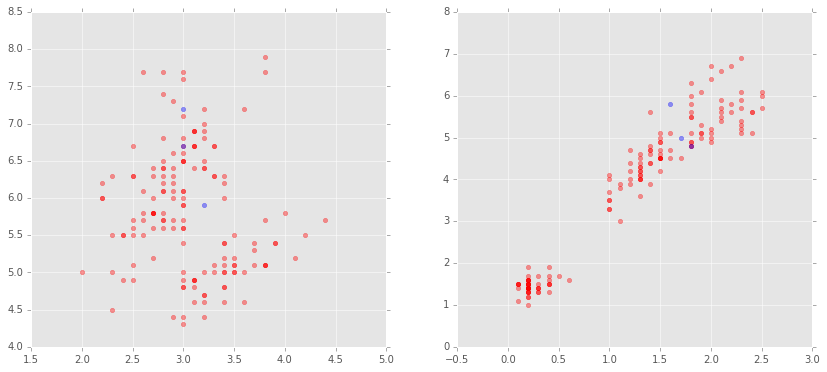

In [8]:
# Draw a scatter of sepal-length vs sepal-width with hued by a binary that is 1 for correct classification and 0 for misclassification
# sns.set(context = 'notebook', style = 'dark', font_scale = 1.2)

scData = data.copy()
scData['predictions'] = classifier.predict(X)

correct = scData[scData['class'] == scData['predictions']]
wrong = scData[scData['class'] != scData['predictions']]

with plt.style.context('ggplot'):
    f, ax = plt.subplots(1, 2, figsize = [14, 6])
    ax[0].scatter(correct['sepal-width'], correct['sepal-length'], c = 'red', edgecolors = 'red', alpha = .4)
    ax[0].scatter(wrong['sepal-width'], wrong['sepal-length'], c = 'blue', edgecolors = 'blue', alpha = .4)
    ax[1].scatter(correct['petal-width'], correct['petal-length'], c = 'red', edgecolors = 'red', alpha = .4)
    ax[1].scatter(wrong['petal-width'], wrong['petal-length'], c = 'blue', edgecolors = 'blue', alpha = .4)


--------------------
# Extra plot #

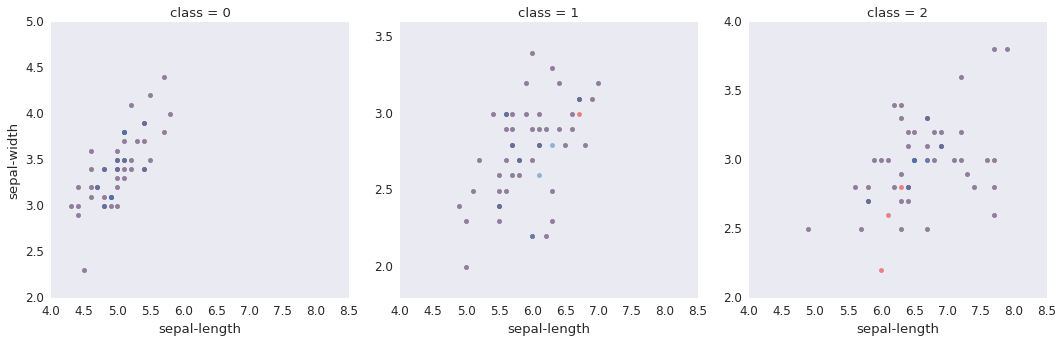

In [78]:
# Another visualization showing the classification quality per class:

sns.set(context = 'notebook', style = 'dark', font_scale = 1.2)

dTruths = data.copy()
dTruths['source'] = 'Truths'

dPreds = data.copy()
dPreds['class'] = classifier.predict(X)
dPreds['source'] = 'Preds'
df = pd.concat([dTruths, dPreds], axis = 0)

fg = sns.FacetGrid(data = df, col = 'class', hue = 'source', size = 5, palette = 'Set1', sharey = False)
_ = fg.map(plt.scatter, 'sepal-length', 'sepal-width', alpha = .5)